In [87]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time
import networkx as nx

Let's work a little bit on how we can visualize a dynamic network/graph. Even if we find a way to plot static graph, we are not happy with that. We want to see the edges getting added and deleted.

https://stackoverflow.com/questions/39658717/plot-dynamically-changing-graph-using-matplotlib-in-jupyter-notebook

The *steps* are as follows (for the test graph at `graphs/4.el`):
1. Read the edges in a list called edge_list from the .el file.
2. Use 50% for the initial round and plot.
3. Read 8 edges in each round for 8 such rounds and plot after every round.

## test on mini graph from GAP tests

In [88]:
def read_edge_list(filename):
    file = open(filename, 'r')
    Lines = file.readlines()

    count = 0
    edge_list = []
    for line in Lines:
        count += 1
        tmp = line.split(' ')
        print("Line{}: {} {}".format(count, int(tmp[0]), int(tmp[1])))
        edge_list = edge_list + [(int(tmp[0]), int(tmp[1]))]
    return edge_list

In [89]:
edge_list = read_edge_list('graphs/4.el')

Line1: 0 13
Line2: 0 13
Line3: 0 9
Line4: 0 0
Line5: 0 8
Line6: 0 0
Line7: 0 12
Line8: 9 9
Line9: 2 1
Line10: 0 3
Line11: 0 0
Line12: 0 8
Line13: 0 7
Line14: 13 9
Line15: 0 8
Line16: 7 12
Line17: 9 4
Line18: 0 0
Line19: 7 3
Line20: 0 2
Line21: 0 13
Line22: 8 4
Line23: 8 7
Line24: 0 10
Line25: 8 7
Line26: 0 13
Line27: 13 9
Line28: 7 12
Line29: 13 11
Line30: 8 13
Line31: 2 4
Line32: 0 9
Line33: 0 4
Line34: 0 12
Line35: 13 13
Line36: 0 13
Line37: 0 8
Line38: 3 9
Line39: 0 12
Line40: 7 4
Line41: 9 11
Line42: 0 8
Line43: 7 13
Line44: 0 9
Line45: 0 0
Line46: 0 2
Line47: 7 1
Line48: 0 7
Line49: 2 9
Line50: 10 1
Line51: 0 0
Line52: 0 1
Line53: 8 7
Line54: 0 7
Line55: 7 2
Line56: 0 0
Line57: 0 1
Line58: 0 11
Line59: 8 9
Line60: 8 12
Line61: 7 9
Line62: 0 7
Line63: 0 3
Line64: 7 13
Line65: 8 7
Line66: 7 1
Line67: 0 0
Line68: 0 0
Line69: 0 4
Line70: 0 8
Line71: 7 1
Line72: 0 0
Line73: 8 7
Line74: 7 4
Line75: 0 4
Line76: 9 4
Line77: 0 11
Line78: 0 9
Line79: 7 1
Line80: 8 9
Line81: 0 4
Line82: 0 4


In [90]:
def run_benchmark(edge_list):
    G = nx.DiGraph()
    for i in range(13):
        G.add_node(i + 1)
    i = 0
    for el in edge_list:
        nx.add_path(G, el)
        i = i + 1
        if (i == 128):
            break

    fig2 = plt.figure()
    G = nx.to_undirected(G)
    G = nx.freeze(G)
    nx.draw_networkx(G, pos = None, with_labels=True, font_weight='bold')
    fig2.canvas.draw()
    plt.show()
    time.sleep(2)

    for j in range(8):
        G = nx.Graph(G)
        for k in range(8):
            nx.add_path(G, edge_list[i])
            i = i + 1
        G = nx.freeze(G)
        fig2.clear()
        nx.draw_networkx(G, pos = nx.circular_layout(G), with_labels=True, font_weight='bold')
        fig2.canvas.draw()
        time.sleep(2)
    return G

<IPython.core.display.Javascript object>


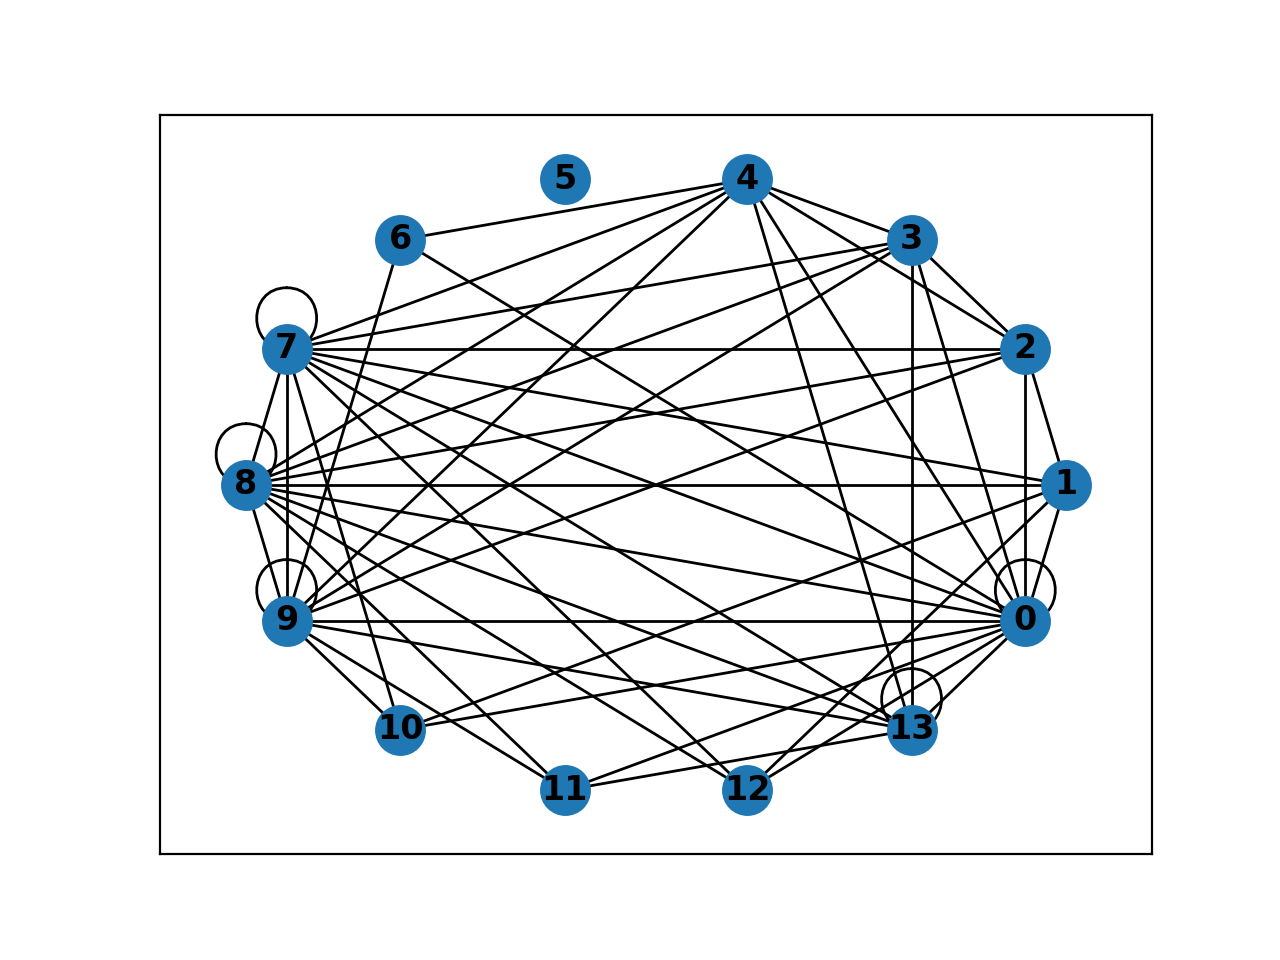

number of nodes 14
number of edges 51


In [92]:
run_benchmark(edge_list)
print("number of nodes", nx.number_of_nodes(G))
print("number of edges", nx.number_of_edges(G))

## test on semi-large graph slashdot.el